Importando bibliotecas utilizadas no projeto

In [5]:
import numpy as np
from math import *
import matplotlib.pyplot as plt
from mpl_toolkits.axisartist import SubplotZero


class Axes():
    
    def __init__(self, xlim=(-5,5), ylim=(-5,5), figsize=(12,5)):
        self.xlim = xlim
        self.ylim = ylim
        self.figsize  = figsize
        self.points   = []
        self.segments = []
        self.vectors  = []
        self.lines    = []
        self.scale_arrows()
    def __arrow__(self, x, y, dx, dy, width, length):
        plt.arrow(
            x, y, dx, dy, 
            color       = 'k',
            clip_on     = False, 
            head_width  = self.head_width, 
            head_length = self.head_length
        ) 
        
    def __drawAxis__(self):
        """
        Draws the 2D cartesian axis
        """
        # A subplot with two additional axis, "xzero" and "yzero"
        # corresponding to the cartesian axis
        ax = SubplotZero(self.fig, 1, 1, 1)
        self.fig.add_subplot(ax)
        
        # make xzero axis (horizontal axis line through y=0) visible.
        for axis in ["xzero","yzero"]:
            ax.axis[axis].set_visible(True)
        # make the other axis (left, bottom, top, right) invisible
        for n in ["left", "right", "bottom", "top"]:
            ax.axis[n].set_visible(False)
            
        # Plot limits
        plt.xlim(self.xlim)
        plt.ylim(self.ylim)
        # Draw the arrows
        self.__arrow__(self.xlim[1], 0, 0.01, 0, 0.3, 0.2) # x-axis arrow
        self.__arrow__(0, self.ylim[1], 0, 0.01, 0.2, 0.3) # y-axis arrow
        
        
    def scale_arrows(self):
        """ Make the arrows look good regardless of the axis limits """
        xrange = self.xlim[1] - self.xlim[0]
        yrange = self.ylim[1] - self.ylim[0]
        
        self.head_width  = min(xrange/30, 0.25)
        self.head_length = min(yrange/30, 0.3)
        
        
    def draw(self, image=None):
        self.scale_arrows()
        self.fig = plt.figure(figsize=self.figsize)
        # First draw the axis
        self.__drawAxis__()
        # Plot each point
        for point in self.points:
            point.draw()
        # Save the image?
        if image:
            plt.savefig(image)
        plt.show()
        
    def addPoints(self, points):
        for p in points:
            self.addPoint(p)
            
    def addPoint(self, p):
        self.points.append(p)
class Point():
    
    def __init__(self, x, y, color='#4ca3dd', size=50, add_coordinates=True):
        self.x = x
        self.y = y
        self.color = color
        self.size  = size
        # self.add_coordinates = add_coordinates
        self.y_offset = 0.2
        self.items = np.array([x,y])
        self.len = 2
        
    def __getitem__(self, index):
        return self.items[index]
    
    def __str__(self):
        return "Point(%.2f,%.2f)" % (self.x, self.y)
    
    def __repr__(self):
        return "Point(%.2f,%.2f)" % (self.x, self.y)
    
    def __len__(self):
        return self.len
    
    def draw(self):
        plt.scatter([self.x], [self.y], color=self.color, s=self.size)
        
        # Add the coordinates if asked by user
        # if self.add_coordinates:
        #     plt.text(
        #         self.x, self.y + self.y_offset,
        #         "(%.1f,%.1f)"%(self.x,self.y),
        #         horizontalalignment='center',
        #         verticalalignment='bottom',
        #         fontsize=12
        #     )

Pontos em que a reta tangente é vertical e pontos em que a reta tangente é horizontal

In [6]:


def processa(lista):
    lista2 = []

    for i in lista:
        dif = True
        for u in lista2:
            if abs(i-u)/(i) < 0.01:
                dif = False
                break
        if dif:
            lista2.append(i)
    return lista2


range_t = np.arange(0,pi*6,0.0001)

def derivada_x(t):
    return -5*sin(t)+8*sin(8*t/3)

def derivada_y(t):
    return  5*cos(t)-8*cos(8*t/3)

tangente_vertical = []
tangente_horizontal = []

for t in range_t:
    dx = derivada_x(t)
    dy = derivada_y(t)
    if round(dx,2) == 0.000:
        tangente_vertical.append(t)
    if round(dy,2) == 0.000:
        tangente_horizontal.append(t)



tan_v = processa(tangente_vertical)
tan_h = processa(tangente_horizontal)

tan_v = tan_v[3:]

print("Pontos em que a tangente é horizontal")
print(tan_h)
print(" ")
print("Pontos em que a tangente é vertical")
print(tan_v)


Pontos em que a tangente é horizontal
[0.3539, 1.7298, 3.1977, 3.9571, 5.1916, 6.7067000000000005, 7.5978, 8.6601, 10.1891, 11.2512, 12.1425, 13.6576, 14.891900000000001, 15.6514, 17.119500000000002, 18.4951]
 
Pontos em que a tangente é vertical
[0.00030000000000000003, 0.9741000000000001, 2.4998, 3.6500000000000004, 4.4678, 5.964300000000001, 7.2748, 7.996300000000001, 9.4246, 10.8528, 11.574200000000001, 12.885, 14.381300000000001, 15.199, 16.3494, 17.8751, 18.8493]


2.4 Comprimento
aproximação pela poligonal

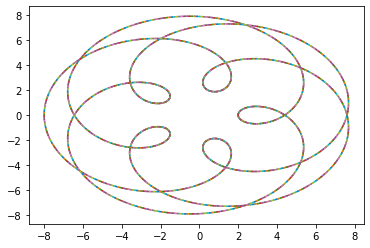

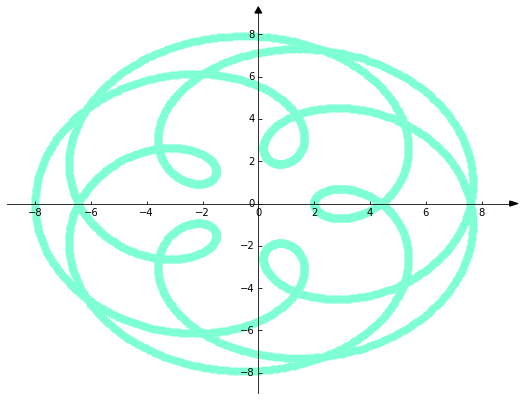

Comprimento de curva aproximado pela poligonal:
165.89118904734073


In [7]:


def calcula_dist(p1,p2):
    return sqrt(((p1[0]-p2[0])**2)+((p1[1]-p2[1])**2))

def funcao(t):
    return (5*cos(t)-3*cos(8*t/3),5*sin(t)-3*sin(8*t/3))


range_t = np.arange(0,pi*6,0.01)

lista_pontos = []
for i in range_t:
    lista_pontos.append(funcao(i))

lista_pontos2 = []

for ponto in lista_pontos:
    lista_pontos2.append(Point(ponto[0],ponto[1],color='#7FFFD4'))


axes = Axes(xlim=(-9,9), ylim=(-9,9), figsize=(9,7))

axes.addPoints(lista_pontos2)
for i in range(0,len(lista_pontos2)-1):
    x_values = [lista_pontos2[i][0],lista_pontos2[i+1][0]]
    y_values = [lista_pontos2[i][1],lista_pontos2[i+1][1]]
    plt. plot(x_values, y_values)
axes.draw()


dist = 0
for i in range(0,len(lista_pontos)):
    if i != 0:
        dist += calcula_dist(lista_pontos[i],lista_pontos[i-1])

print("Comprimento de curva aproximado pela poligonal:")
print(dist) 

2.4.2 Distancia aproximada pela integral

In [8]:
step = 0.0001

range_t = np.arange(0,pi*6,step)

def funcao_para_integrar(t):
    return sqrt(89-(80*((sin(t)*sin(8*t/3))+(cos(t)*cos(8*t/3)))))

lista_pontos = []
for i in range_t:
    lista_pontos.append(funcao_para_integrar(i))


def integra(lista,step):
    area = 0
    for i in range(0,len(lista)):
        if i != 0:
            area+= (lista[i-1] + lista[i])*step/2
    return area

integral = integra(lista_pontos,step)

print("Comprimento de curva aproximado pela integral:")
print(integral)

Comprimento de curva aproximado pela integral:
165.9238137344715


2.5.1 Aproximação por figuras mais simples.
figura mais simples escolhida - triângulos.

In [9]:
def calcula_dist_centro(p1):
    return sqrt((p1[0]**2)+(p1[1]**2))


def calcula_h(p1,p2):
    ponto_medio_segmento_p1p2 = (((p1[0]+p2[0])/2),((p1[1]+p2[1])/2))
    return calcula_dist_centro(ponto_medio_segmento_p1p2)



range_t = np.arange(0,pi*6,0.00005)

lista_pontos = []
min_dist = calcula_dist_centro(funcao(1.4966044077181078))
for i in range_t:
    lista_pontos.append(funcao(i))

app = False
dic_pontos_externos = {1:[],2:[],3:[],4:[],5:[],}

contador = 0
for i in range(0,len(lista_pontos)):
    if calcula_dist_centro(lista_pontos[i]) >= min_dist:
        if app == False:
            contador+=1
        app = True
        dic_pontos_externos[contador].append(lista_pontos[i])
    else:
        app = False


lista_pontos_ordenados = dic_pontos_externos[4] + dic_pontos_externos[1] + dic_pontos_externos[3] + dic_pontos_externos[5] + dic_pontos_externos[2]

area_interna = 0

for i in range(0,len(lista_pontos_ordenados)):
    if i != 0:
        base = calcula_dist(lista_pontos_ordenados[i],lista_pontos_ordenados[i-1])
        altura = calcula_h(lista_pontos_ordenados[i],lista_pontos_ordenados[i-1])
        area_interna += (base*altura)/2

print("Área interna obtida por aproximação com triângulos")
print(area_interna)

Área interna obtida por aproximação com triângulos
195.4369043119911


2.5.2
Integral area interna analítica

In [10]:
def primitiva(t):
    t1 = -25*(t-(sin(t)*cos(t)))
    t2 = 45*((3*sin(5*t/3)/5)-(3*sin(11*t/3)/11))
    t3 = -9*((8*t/3)-(sin(8*t/3)*cos(8*t/3)))
    return t1+t2+t3

def calcula_integral(t1,t2):
    return primitiva(t2) - primitiva(t1)

#intervalos_integracao = [(5.266,6.043),(12.806,13.583),(1.496,2.273),(9.036,9.813),(-2.273,-1.496)]

intervalos_integracao = [[1.4966044077181078, 2.2733138154634673],[5.266518553152036,  6.043217960897396],[ 9.036419737459788, 9.813134145205147],[12.806, 13.5830403295129],[16.5765, 17.3529]]


integral = 0
for i in intervalos_integracao:
    integral += abs(calcula_integral(i[0],i[1]))
print(integral)

353.08338594789683
